In [1]:
import itertools
from collections import Counter
from parse import load_dataframes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import folium

In [2]:
dataframes=load_dataframes()
n=100

In [38]:
# 폰트, 그래프 색상 설정
font_list = fm.findSystemFonts(fontpaths=None, fontext="ttf")
if any(["notosanscjk" in font.lower() for font in font_list]):
  # plt.rcParams["font.family"] = "Noto Sans CJK JP"
  plt.rcParams["font.family"] = "AppleGothic" # 제 작업환경이 맥인 관계로 이부분 주석하고 윗부분 주석해제 하시면 됩니다.
else:
  if not any(["malgun" in font.lower() for font in font_list]):
    raise Exception(
        "Font missing, please install Noto Sans CJK or Malgun Gothic. If you're using ubuntu, try `sudo apt install fonts-noto-cjk`"
    )

  plt.rcParams["font.family"] = "Malgun Gothic"

sns.set_palette(sns.color_palette("Spectral"))
plt.rc("xtick", labelsize=6)

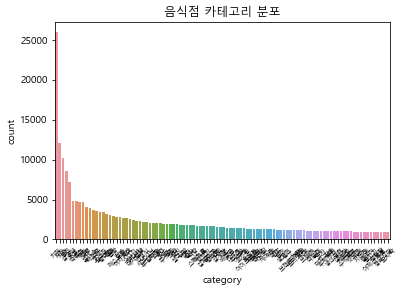

In [4]:
"""
Tutorial: 전체 음식점의 상위 `n`개 카테고리 분포를 그래프로 나타냅니다.
"""

stores = dataframes["stores"]

# 모든 카테고리를 1차원 리스트에 저장합니다
categories = stores.category.apply(lambda c: c.split("|"))
categories = itertools.chain.from_iterable(categories)

# 카테고리가 없는 경우 / 상위 카테고리를 추출합니다
categories = filter(lambda c: c != "", categories)
categories_count = Counter(list(categories))
best_categories = categories_count.most_common(n=n)
df = pd.DataFrame(best_categories, columns=["category", "count"]).sort_values(
    by=["count"], ascending=False
)

# 그래프로 나타냅니다
chart = sns.barplot(x="category", y="count", data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("음식점 카테고리 분포")
plt.show()

      score  index
1     29337      1
2      8065      2
3      3371      3
4      1693      4
5       950      5
6       586      6
7       398      7
8       262      8
9       195      9
10      144     10
11      106     11
12      102     12
13       73     13
14       60     14
15       40     15
17       37     17
16       37     16
18       28     18
20       24     20
19       24     19
23       16     23
21       16     21
22       15     22
24       14     24
27       11     27
26       10     26
25       10     25
29        8     29
30        6     30
35        5     35
37        5     37
34        4     34
33        4     33
32        4     32
49        4     49
44        4     44
40        3     40
31        3     31
36        3     36
55        3     55
39        2     39
48        2     48
53        1     53
64        1     64
61        1     61
28        1     28
65        1     65
59        1     59
58        1     58
42        1     42
51        1     51
41        1 

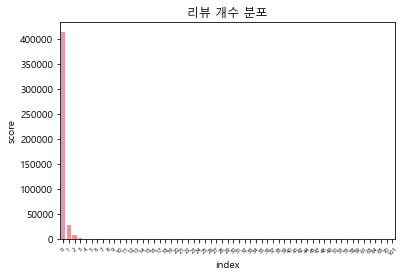

In [5]:
"""
Req. 1-3-1 전체 음식점의 리뷰 개수 분포를 그래프로 나타냅니다. 
"""
# 왼쪽 id, 오른쪽 store 기준으로 공통 된 것 merge
stores_reviews = pd.merge(
    dataframes["stores"], dataframes["reviews"], left_on="id", right_on="store", how="outer"
)
# 리뷰가 0인 가게
zero=stores_reviews['score'].isna().sum()
# # 가게 id, 가게 이름으로 그룹화
scores_group = stores_reviews.groupby(["store", "store_name"])
scores_group=scores_group.count()["score"].value_counts()

df = pd.DataFrame(scores_group)
df['index']=df.index
df.loc[0]=[zero,0]
print(df)
# df.set_index("index",inplace=True)
# df.set_index("sc",inplace=True)
# 그래프로 나타냅니다
chart = sns.barplot(x="index", y="score", data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("리뷰 개수 분포")
plt.show()

[(4.0, 13705), (5.0, 11081), (3.0, 7381), (4.5, 2116), (1.0, 1921), (2.0, 1744), (3.5, 1610), (4.3, 775), (3.7, 671), (3.8, 546), (4.2, 544), (2.5, 491), (4.7, 476), (3.3, 451), (3.2, 263), (3.6, 230), (4.8, 220), (4.4, 201), (3.4, 173), (2.7, 147), (3.9, 143), (4.1, 142), (4.6, 110), (2.8, 106), (1.5, 95), (2.3, 95), (3.1, 56), (2.9, 34), (2.2, 30), (1.7, 30), (2.6, 28), (2.4, 24), (4.9, 20), (1.3, 15), (1.8, 13), (2.1, 6), (1.2, 3), (1.6, 2), (0.0, 1), (1.9, 1)]


/Library/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Library/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Library/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Library/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Library/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Library/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:65: RuntimeWarning: Glyph 44512 missing from curre

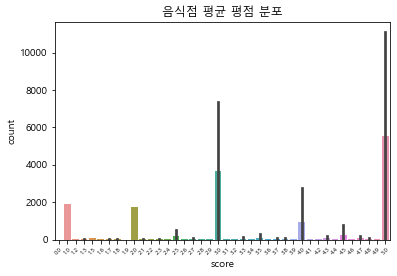

In [6]:
"""
Req. 1-3-2 각 음식점의 평균 평점을 그래프로 나타냅니다.
"""
# 왼쪽 id, 오른쪽 store 기준으로 공통 된 것 merge
stores_reviews = pd.merge(
dataframes["stores"], dataframes["reviews"], left_on="id", right_on="store"
    )

scores_group = stores_reviews.groupby(["store", "store_name"]).mean()

list = []
for i, sc in scores_group.iterrows():
    list.append(round(sc["score"], 1))

scores_count = Counter(list).most_common()
print(scores_count)


df = pd.DataFrame(scores_count, columns=["score", "count"]).sort_values(by=["count"], ascending=False)

# 그래프로 나타냅니다
chart = sns.barplot(x="score", y="count", data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("음식점 평균 평점")
plt.show()


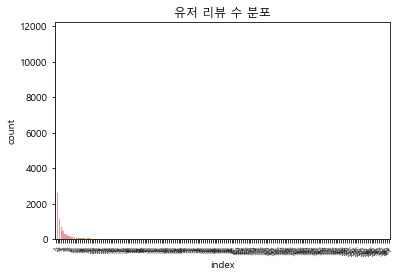

In [7]:
"""
Req. 1-3-3 전체 유저의 리뷰 개수 분포를 그래프로 나타냅니다.
"""
user_reviews=dataframes['reviews']

# user로 그룹화
scores_group = user_reviews.groupby("user")
scores_group=scores_group.count()["score"].value_counts()

# 데이터프레임으로 만들기
df = pd.DataFrame(scores_group)
df['index']=df.index
df.columns = ['count', 'index']

# 그래프로 나타냅니다
chart = sns.barplot(x="index", y="count", data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("유저 리뷰 수 분포")
plt.show()

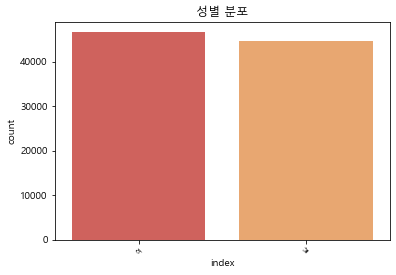

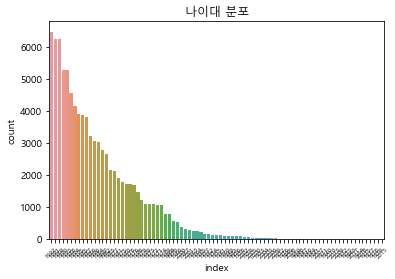

In [8]:
"""
Req. 1-3-3 전체 유저의 리뷰 개수 분포를 그래프로 나타냅니다.
"""
user_info=dataframes['users']

# user 성별로 그룹화
gender_info=user_info["gender"].value_counts()

# user 나이대로 그룹화
age_info=user_info["age"].value_counts()

# 데이터프레임으로 만들기
df = pd.DataFrame(gender_info)
df['index']=df.index
df.columns = ['count', 'index']

age_df = pd.DataFrame(age_info)
age_df['index']=age_df.index
age_df.columns = ['count', 'index']

# 그래프로 나타냅니다
chart = sns.barplot(x="index", y="count", data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("성별 분포")
plt.show()

chart = sns.barplot(x="index", y="count", data=age_df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("나이대 분포")
plt.show()

In [9]:
"""
Req. 1-3-3 전체 유저의 리뷰 개수 분포를 그래프로 나타냅니다.
"""
store_info=dataframes['stores']
print(store_info)
# user로 그룹화
# scores_group = user_reviews.groupby("user")
# scores_group=scores_group.count()["score"].value_counts()

# 데이터프레임으로 만들기
# df = pd.DataFrame(scores_group)
# df['index']=df.index
# df.columns = ['count', 'index']

# 그래프로 나타냅니다
# chart = sns.barplot(x="index", y="count", data=df)
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
# plt.title("유저 리뷰 수 분포")
# plt.show()

            id     store_name branch  area            tel  \
0            1           Agal   None    홍대  010-6689-5886   
1            2         Assisy   None    광주   062-367-0700   
2            3  Battered Sole   None   이태원    02-749-6867   
3            4      Chakyoung   None  달맞이길   051-756-5566   
4            5       Delabobo   None   발산역   02-2667-9854   
...        ...            ...    ...   ...            ...   
459983  459996         행복부대찌개   None   녹양동   031-877-2410   
459984  459997           행복부페   None   안중읍   031-682-1733   
459985  459998           행복분식   None   퇴촌면  031-8071-2668   
459986  459999           행복분식   None   소주동   055-312-3713   
459987  460000           행복분식   None  의정부동   031-772-6624   

                      address   latitude   longitude   category  
0        서울특별시 마포구 동교동 170-13  37.556862  126.926666   아구찜|포장마차  
1         광주광역시 서구 농성동 631-33  35.150746  126.890062         카페  
2        서울특별시 용산구 이태원동 118-9  37.535032  126.991664    피쉬앤칩스|펍  
3  

In [ ]:
"""
Req. 1-3-3 전체 유저의 리뷰 개수 분포를 그래프로 나타냅니다.
"""

users_reviews =  dataframes["reviews"].groupby("user").count()

print(users_reviews)

reviews_cnt = []
for i, r in users_reviews.iterrows():
    reviews_cnt.append(r["score"])

reviews_cnt = Counter(reviews_cnt).most_common()

df = pd.DataFrame(reviews_cnt, columns=["reviews", "count"]).sort_values(by=["reviews"], ascending=True)

# 그래프로 나타냅니다
chart = sns.barplot(x="reviews", y="count", data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("유저 리뷰 개수 분포")
plt.show()


In [ ]:
users = dataframes["users"]
users["age"] = users["age"] // 10 * 10
man_list, woman_list = [], []
for i, u in users.iterrows():
    if u["gender"] == '남':
        man_list.append(u["age"])
    else:
        woman_list.append(u["age"])

man_count = Counter(man_list)
woman_count = Counter(woman_list)
    
plt.plot([v for v in range(0, 110, 10)], [man_count[v] for v in range(0, 110, 10)], marker="o", label="남성")
plt.plot([v for v in range(0, 110, 10)], [woman_count[v] for v in range(0, 110, 10)], marker="o", label="여성")
plt.legend(loc=(0.8, 0.8))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title("유저 성별 / 나이대 분포")
plt.show()


In [75]:
stores_group = dataframes["stores"]
# print(stores_group.store_name)

ex = {
    '위도' : [stores_group.latitude],
    '경도' : [stores_group.longitude],
    '이름' : [stores_group.store_name],
}



lati = 127.0016985
longi = 37.5642135

m = folium.Map([lati, longi], zoom_start=9)

print(ex.keys)
# for i in ex:
    
#     sub_lat = ex[i, '위도']
#     sub_long = ex[i, '경도']

#     title = ex.loc[i, '구분']

#     folium.Marker([sub_lat, sub_long], tooltip=title).add_to(m)

# m.save('example.html')
# m


# chart = sns.barplot(x="area", y="count", data=df)
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
# plt.title("음식점 위치 분포")
# plt.show()


<built-in method keys of dict object at 0x7f89e1adcb00>
